In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from viz import viz_interactive, viz
from modeling import exponential_modeling
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data
import load_data

from plotly.offline import init_notebook_mode, iplot

df = load_data.load_county_level()
df = df.sort_values('tot_deaths', ascending=False)
important_vars = load_data.important_keys(df)
print(df.keys())

Loading BokehJS ...

Index(['id', 'Header-FIPSStandCtyCode', 'EntityofFile',
       'SecondaryEntityOfFile', 'DateofFile', 'DateofCreation', 'FileLength',
       'StateName', 'StateNameAbbreviation', 'CountyName',
       ...
       '#Deaths_3/24/2020', '#Deaths_3/25/2020', '#Deaths_3/26/2020',
       '#Deaths_3/27/2020', '#Deaths_3/28/2020', '#Deaths_3/29/2020', 'deaths',
       'cases', 'tot_deaths', 'tot_cases'],
      dtype='object', length=7322)


## how many deaths/cases are there

In [2]:
df[['tot_deaths', 'tot_cases', 'StateName', 'CountyName', ]].head(10)

,tot_deaths,tot_cases,StateName,CountyName
1841,253,10737,New York,Queens
1803,188,6250,New York,Bronx
1824,185,8887,New York,Kings
2941,144,2161,Washington,King
1831,103,5582,New York,New York
1121,73,1350,Louisiana,Orleans
1285,56,2704,Michigan,Wayne
1843,46,1984,New York,Richmond
1852,40,5023,New York,Suffolk
583,40,3445,Illinois,Cook


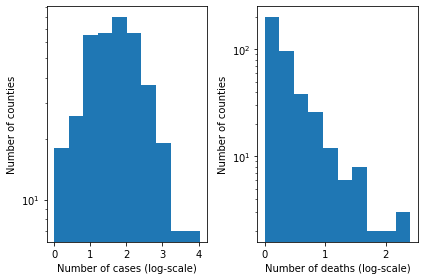

In [3]:
d = df[(df['tot_deaths'] > 0) & (df['tot_cases'] > 0)]
R, C = 1, 2
plt.subplot(R, C, 1)
plt.hist(np.log10(d['tot_cases']))
plt.xlabel('Number of cases (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')

plt.subplot(R, C, 2)
plt.hist(np.log10(d['tot_deaths']))
plt.xlabel('Number of deaths (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
plt.hist(df['#Hospitals'], bins=100)
plt.xlabel('#Hospitals (per county)')
plt.show()

# correlations

In [ ]:
d = df[[k for k in important_vars if not 'PopMale' in k and not 'PopFmle' in k and not 'MortalityAge' in k and not 'PopTotal' in k] + 
        ['tot_deaths', 'tot_cases']]

viz.corrplot(d)
plt.savefig('results/correlations_heatmap.png')
plt.show()

In [ ]:
keys = np.array(corrs.index)
k = np.where(keys == 'tot_deaths')[0][0]
corrs_row = corrs.iloc[k]
args = np.argsort(corrs_row)
plt.figure(dpi=300, figsize=(6, 5))
plt.barh(keys[args][:-1], corrs_row[args][:-1]) # 1 to drop outcome itself
plt.xlabel('Correlation (spearman) with # deaths')
plt.tight_layout()
plt.savefig('results/correlations.png')
plt.show()

# interactive plots

In [5]:
ks = [k for k in important_vars if not 'PopMale' in k
      and not 'PopFmle' in k
      and not 'MortalityAge' in k]

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz_interactive.plot_counties(d, 
                          variable_to_distribute='tot_cases',
                          variables_to_display=ks,
                          state=state,
                          logcolor=False)
    
    output_file(f"results/{state}.html", mode='inline')
    show(p)
    save(p)

In [ ]:
viz_interactive.plot_counties_slider(df, target_days=np.array([1, 2, 3, 4]), filename="results/deaths.html")

## plot political leaning

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz_interactive.plot_counties(d, 
                          variable_to_distribute='dem_to_rep_ratio',
                          variables_to_display=ks,
                          state=state,
                          logcolor=False)
    show(p)

**viz curves**

In [ ]:
df_tab = df[['tot_deaths', 'tot_cases', 'CountyName', 'StateName', 
             'PopulationDensityperSqMile2010',
             'deaths', 'cases']].head(12)        
# df_tab = df_tab.rename(columns={'PopulationEstimate2018': 'Population\n(thousands})'})
df_tab = df_tab.rename(columns={'PopulationDensityperSqMile2010': 'PopDensity'})
df_tab = df_tab.rename(columns={'tot_deaths': '#Deaths', 'tot_cases': '#Cases'})
df_tab = df_tab.rename(columns={'CountyName': 'County', 'StateName': 'State'})
print(df_tab.keys())
# df_tab['Population']
keys_table = [k for k in df_tab.keys() if not k in ['deaths', 'cases']]
viz_interactive.viz_curves(df_tab, 
               key_toggle='County',
               keys_table=keys_table,
               filename='results/county_curves.html')
print('done!')